In [23]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from astropy.io import fits
import h5py
import random
import copy
import json

In [24]:
# Super top path:
super_top_dir = "/orcd/pool/005/vianajr/cluster_ages_1/"

# Path to super top results:
parent_dir = super_top_dir + "results/many_case/"

In [25]:
# Flag to remove the young and old clusters:
flag_remove_extremes = True # Currently removing younger than 10^7 years and older than 10^9.5

# Flag to use the inner or the outer region of the circle:
flag_black_inner = True # If flag_black_inner is True, we are blacking out the center, if False, we black out the outer region.


In [26]:
# Aux text:
txt_remextremes = "yes" if flag_remove_extremes else "no"

# Extension for the paths:
if flag_black_inner: extension = "inner"
else: extension = "outer"

# The directory
dir_top_results = parent_dir + f"many_case_1im_remextremes_{txt_remextremes}_augment_no_blackout_{extension}_normby_single-image/"

# The top R:
top_R = 40
# Number of models per case:
num_models_per_case = 5

# The Rs we are studying:
if flag_black_inner: arr_R = list(range(0, top_R+1))
else:  arr_R = list(range(1, top_R+1))

In [27]:
 
# Initialize the arrays for the average of metrics:
arr_avgs_tr_final_MSE_nrm = []
arr_avgs_vl_final_MSE_nrm = []
arr_avgs_ts_final_MSE_nrm = []
arr_avgs_tr_final_MdAEs_dnrm = []
arr_avgs_vl_final_MdAEs_dnrm = []
arr_avgs_ts_final_MdAEs_dnrm = []

# Initialize the arrays for the standard deviations of metrics:
arr_stdv_tr_final_MSE_nrm = []
arr_stdv_vl_final_MSE_nrm = []
arr_stdv_ts_final_MSE_nrm = []
arr_stdv_tr_final_MdAEs_dnrm = []
arr_stdv_vl_final_MdAEs_dnrm = []
arr_stdv_ts_final_MdAEs_dnrm = []

# ------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------
# Loop through the values of R:
for R in arr_R:
    
    # Create the folder for these results:
    dir_results = dir_top_results + f"R_{R}/"
    
    # Initialize the arrays of all the final results for a particular R:
    arr_of_tr_final_MSE_nrm_of_all_models_for_R = []
    arr_of_vl_final_MSE_nrm_of_all_models_for_R = []
    arr_of_ts_final_MSE_nrm_of_all_models_for_R = []
    
    arr_of_tr_final_MdAEs_dnrm_of_all_models_for_R = []
    arr_of_vl_final_MdAEs_dnrm_of_all_models_for_R = []
    arr_of_ts_final_MdAEs_dnrm_of_all_models_for_R = []
    
    # Do these steps num_models_per_case times:
    for k in range(num_models_per_case):

        # The directory of the model:
        dir_results_model_k = dir_results + f"model_{k}/"

        # Define the path to the pickle file
        file_path = dir_results_model_k + 'final_metrics.pkl'

        # Load the pickle file
        with open(file_path, 'rb') as f:
            data = pickle.load(f)

        # Now you can access the saved metrics from the loaded dictionary
        arr_of_tr_final_MSE_nrm_of_all_models_for_R.append( data['tr_final_MSE_nrm'] )
        arr_of_vl_final_MSE_nrm_of_all_models_for_R.append(  data['vl_final_MSE_nrm'] )
        arr_of_ts_final_MSE_nrm_of_all_models_for_R.append(  data['ts_final_MSE_nrm'] )

        arr_of_tr_final_MdAEs_dnrm_of_all_models_for_R.append(  data['tr_final_MdAEs_dnrm'] )
        arr_of_vl_final_MdAEs_dnrm_of_all_models_for_R.append(  data['vl_final_MdAEs_dnrm'] )
        arr_of_ts_final_MdAEs_dnrm_of_all_models_for_R.append(  data['ts_final_MdAEs_dnrm'] )


    # Now, after we have seen all the k models of this case, append the average and the stdv:
    # Averages:
    arr_avgs_tr_final_MSE_nrm.append( np.mean(arr_of_tr_final_MSE_nrm_of_all_models_for_R) )
    arr_avgs_vl_final_MSE_nrm.append( np.mean(arr_of_vl_final_MSE_nrm_of_all_models_for_R) )
    arr_avgs_ts_final_MSE_nrm.append( np.mean(arr_of_ts_final_MSE_nrm_of_all_models_for_R) )
    arr_avgs_tr_final_MdAEs_dnrm.append( np.mean(arr_of_tr_final_MdAEs_dnrm_of_all_models_for_R) )
    arr_avgs_vl_final_MdAEs_dnrm.append( np.mean(arr_of_vl_final_MdAEs_dnrm_of_all_models_for_R) )
    arr_avgs_ts_final_MdAEs_dnrm.append( np.mean(arr_of_ts_final_MdAEs_dnrm_of_all_models_for_R) )

    # Stdvs:
    arr_stdv_tr_final_MSE_nrm.append( np.std(arr_of_tr_final_MSE_nrm_of_all_models_for_R) )
    arr_stdv_vl_final_MSE_nrm.append( np.std(arr_of_vl_final_MSE_nrm_of_all_models_for_R) )
    arr_stdv_ts_final_MSE_nrm.append( np.std(arr_of_ts_final_MSE_nrm_of_all_models_for_R) )
    arr_stdv_tr_final_MdAEs_dnrm.append( np.std(arr_of_tr_final_MdAEs_dnrm_of_all_models_for_R) )
    arr_stdv_vl_final_MdAEs_dnrm.append( np.std(arr_of_vl_final_MdAEs_dnrm_of_all_models_for_R) )
    arr_stdv_ts_final_MdAEs_dnrm.append( np.std(arr_of_ts_final_MdAEs_dnrm_of_all_models_for_R) )



In [28]:
# Initialize the arrays of all the final results for a particular R:
arr_of_tr_final_MSE_nrm_of_all_models_for_R = np.array(arr_of_tr_final_MSE_nrm_of_all_models_for_R)
arr_of_vl_final_MSE_nrm_of_all_models_for_R = np.array(arr_of_vl_final_MSE_nrm_of_all_models_for_R)
arr_of_ts_final_MSE_nrm_of_all_models_for_R = np.array(arr_of_ts_final_MSE_nrm_of_all_models_for_R)

arr_of_tr_final_MdAEs_dnrm_of_all_models_for_R = np.array(arr_of_tr_final_MdAEs_dnrm_of_all_models_for_R)
arr_of_vl_final_MdAEs_dnrm_of_all_models_for_R = np.array(arr_of_vl_final_MdAEs_dnrm_of_all_models_for_R)
arr_of_ts_final_MdAEs_dnrm_of_all_models_for_R = np.array(arr_of_ts_final_MdAEs_dnrm_of_all_models_for_R)

In [29]:

# ------------------------------------------------------------------------------------------------------------
# Save the arrays of metrics in a pickle file
with open(dir_top_results + 'arr_final_metrics.pkl', 'wb') as f:
    pickle.dump({
        'arr_R': arr_R,
        
        'arr_avgs_tr_final_MSE_nrm': arr_avgs_tr_final_MSE_nrm,
        'arr_avgs_vl_final_MSE_nrm': arr_avgs_vl_final_MSE_nrm,
        'arr_avgs_ts_final_MSE_nrm': arr_avgs_ts_final_MSE_nrm,
        
        'arr_avgs_tr_final_MdAEs_dnrm': arr_avgs_tr_final_MdAEs_dnrm,
        'arr_avgs_vl_final_MdAEs_dnrm': arr_avgs_vl_final_MdAEs_dnrm,
        'arr_avgs_ts_final_MdAEs_dnrm': arr_avgs_ts_final_MdAEs_dnrm,
        
        'arr_stdv_tr_final_MSE_nrm': arr_stdv_tr_final_MSE_nrm,
        'arr_stdv_vl_final_MSE_nrm': arr_stdv_vl_final_MSE_nrm,
        'arr_stdv_ts_final_MSE_nrm': arr_stdv_ts_final_MSE_nrm,
        
        'arr_stdv_tr_final_MdAEs_dnrm': arr_stdv_tr_final_MdAEs_dnrm,
        'arr_stdv_vl_final_MdAEs_dnrm': arr_stdv_vl_final_MdAEs_dnrm,
        'arr_stdv_ts_final_MdAEs_dnrm': arr_stdv_ts_final_MdAEs_dnrm,  
        
    }, f)
    

In [30]:
# The diameter:
arr_D = np.array(arr_R)*2

### Get the baseline

In [31]:
# Path to baseline results directory
dir_baseline = super_top_dir + f"results/baseline/baseline_remextremes_{txt_remextremes}/baseline_dex_results.pkl"

# Load the pickle file
with open(dir_baseline, "rb") as f:
    results_dex = pickle.load(f)

# Extract values
baseline_dex_tr = results_dex["dex_tr"]
baseline_dex_vl = results_dex["dex_vl"]
baseline_dex_ts = results_dex["dex_ts"]
mean_train_output = results_dex["mean_train_output"]

# Display them
print("Tr. Dex:", baseline_dex_tr)
print("Vl. Dex:", baseline_dex_vl)
print("Ts. Dex:", baseline_dex_ts)
print("Mean Train Output:", mean_train_output)


Tr. Dex: 0.5675714111328125
Vl. Dex: 0.5632196760177612
Ts. Dex: 0.6137616157531738
Mean Train Output: 8.099079


In [32]:
# Convert to numpy arrays if they are not already
arr_avgs_tr_final_MdAEs_dnrm = np.array(arr_avgs_tr_final_MdAEs_dnrm)
arr_avgs_vl_final_MdAEs_dnrm = np.array(arr_avgs_vl_final_MdAEs_dnrm)
arr_avgs_ts_final_MdAEs_dnrm = np.array(arr_avgs_ts_final_MdAEs_dnrm)


# We need the information of the other case for the predictive power comparison

In [33]:
txt_remextremes = "no"

# The directory
comp_dir_top_results = parent_dir + f"many_case_1im_remextremes_{txt_remextremes}_augment_no_blackout_{extension}_normby_single-image/"

# Path to baseline results directory
comp_dir_baseline = super_top_dir + f"/results/baseline/baseline_remextremes_{txt_remextremes}/baseline_dex_results.pkl"

# -------------------------------------------------------------------------------------------

# Load the pickle file
with open(comp_dir_baseline, "rb") as f:
    comp_results_dex = pickle.load(f)

# Extract values
comp_baseline_dex_ts = comp_results_dex["dex_ts"]

# Display them
print("Ts. Dex:", comp_baseline_dex_ts)

# -------------------------------------------------------------------------------------------

# Initialize the arrays for the average of metrics:
comp_arr_avgs_ts_final_MdAEs_dnrm = []

# Loop through the values of R:
for R in arr_R:
    
    # Create the folder for these results:
    dir_results = comp_dir_top_results + f"R_{R}/"
    
    arr_of_ts_final_MdAEs_dnrm_of_all_models_for_R = []
    
    # Do these steps num_models_per_case times:
    for k in range(num_models_per_case):

        # The directory of the model:
        dir_results_model_k = dir_results + f"model_{k}/"

        # Define the path to the pickle file
        file_path = dir_results_model_k + 'final_metrics.pkl'

        # Load the pickle file
        with open(file_path, 'rb') as f:
            data = pickle.load(f)

        arr_of_ts_final_MdAEs_dnrm_of_all_models_for_R.append(  data['ts_final_MdAEs_dnrm'] )

    # Now, after we have seen all the k models of this case, append the average:
    comp_arr_avgs_ts_final_MdAEs_dnrm.append( np.mean(arr_of_ts_final_MdAEs_dnrm_of_all_models_for_R) )

# Convert to numpy array:
comp_arr_avgs_ts_final_MdAEs_dnrm = np.array(comp_arr_avgs_ts_final_MdAEs_dnrm)

# Compare
comp_predictive_capability = 100 *  (comp_baseline_dex_ts**2 - comp_arr_avgs_ts_final_MdAEs_dnrm**2) / comp_baseline_dex_ts**2



Ts. Dex: 1.2200055646896362


# The Plot

In [34]:
# Custom colors for better presentation
colors = ['#a9a9a9', '#1565c0', '#c62828'] 

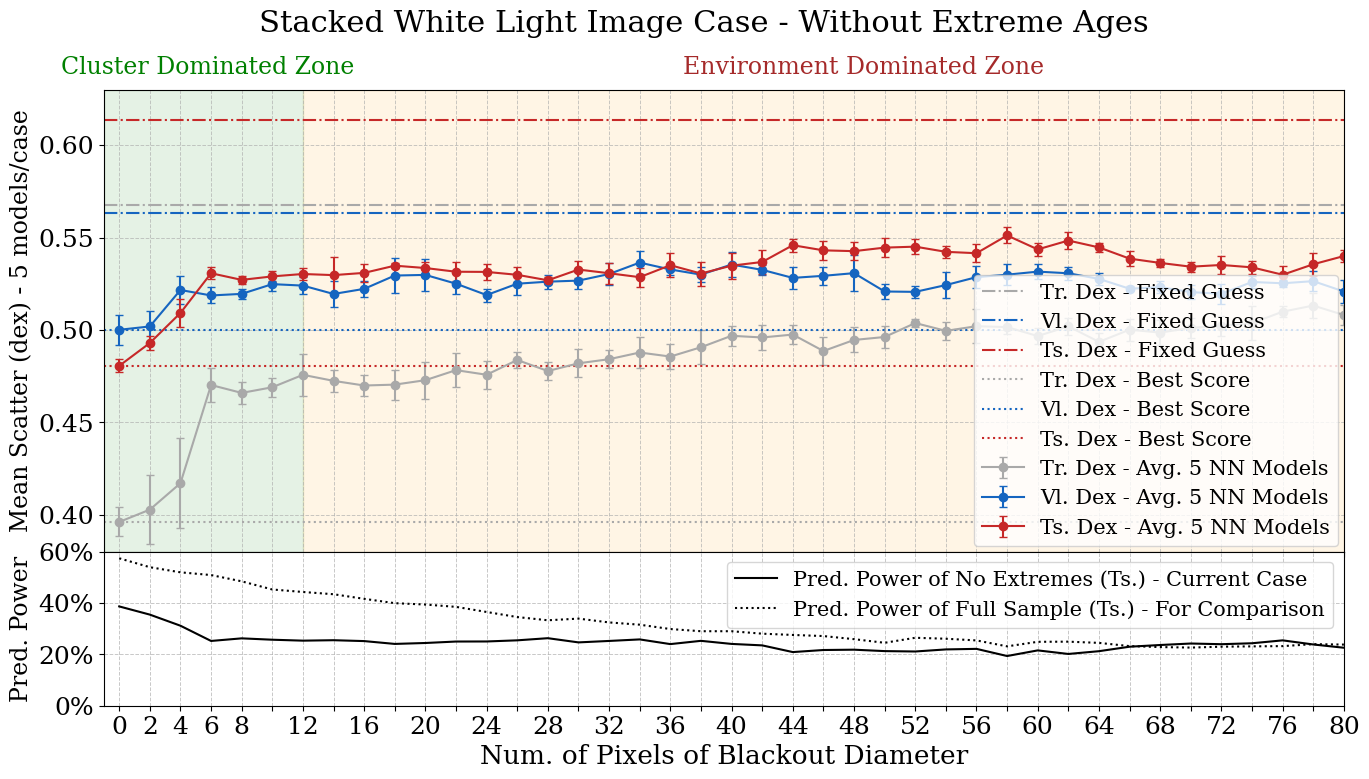

In [35]:
if flag_black_inner:
    
    #### Setting the font style to Times New Roman and adjusting font sizes for journal style
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.size'] = 16  # Bigger font size for readability

    # Create the subplots: 2 rows, 1 column, with different height ratios and share the x-axis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

    #### First subplot (your current plot) ####
    # Adding backgrounds to delimit the regions (now applied to the top plot)
    ax1.axvspan(-1, 12, color='green', alpha=0.1)
    ax1.axvspan(12, arr_D[-1], color='orange', alpha=0.1)
    # Adding text outside the plot as subtitles for each region
    fig.text(0.19, 0.9, 'Cluster Dominated Zone', ha='center', fontsize=17, color='green')
    fig.text(0.6, 0.9, 'Environment Dominated Zone', ha='center', fontsize=17, color='brown')

    # Adjusting the super title upwards
    plt.suptitle('Stacked White Light Image Case - Without Extreme Ages', y=0.98, fontsize=22)

    # Plotting with error bars and cool colors
    ax1.errorbar(arr_D, arr_avgs_tr_final_MdAEs_dnrm, yerr=arr_stdv_tr_final_MdAEs_dnrm, 
                 label='Tr. Dex - Avg. 5 NN Models', capsize=3, fmt='-o', color=colors[0])
    ax1.errorbar(arr_D, arr_avgs_vl_final_MdAEs_dnrm, yerr=arr_stdv_vl_final_MdAEs_dnrm, 
                 label='Vl. Dex - Avg. 5 NN Models', capsize=3, fmt='-o', color=colors[1])
    ax1.errorbar(arr_D, arr_avgs_ts_final_MdAEs_dnrm, yerr=arr_stdv_ts_final_MdAEs_dnrm, 
                 label='Ts. Dex - Avg. 5 NN Models', capsize=3, fmt='-o', color=colors[2])

    # Adding horizontal dashed lines at baseline values
    ax1.axhline(y=baseline_dex_tr, color=colors[0], linestyle='-.', label='Tr. Dex - Fixed Guess')
    ax1.axhline(y=baseline_dex_vl, color=colors[1], linestyle='-.', label='Vl. Dex - Fixed Guess')
    ax1.axhline(y=baseline_dex_ts, color=colors[2], linestyle='-.', label='Ts. Dex - Fixed Guess')

    # Adding horizontal dashed lines at best scores:
    ax1.axhline(y=arr_avgs_tr_final_MdAEs_dnrm[0], color=colors[0], linestyle=':', label='Tr. Dex - Best Score')
    ax1.axhline(y=arr_avgs_vl_final_MdAEs_dnrm[0], color=colors[1], linestyle=':', label='Vl. Dex - Best Score')
    ax1.axhline(y=arr_avgs_ts_final_MdAEs_dnrm[0], color=colors[2], linestyle=':', label='Ts. Dex - Best Score')

    # Axis labels and title with larger font sizes
    ax1.set_ylabel('Mean Scatter (dex) - 5 models/case', fontsize=17)

    # Setting y-ticks for the top plot (in steps of 0.05, e.g., 0.2, 0.25, 0.3, etc.)
    ax1.set_yticks(np.arange(0.4, 0.65, 0.05))

    # Ensuring the x-axis ticks are set as required (grid lines every 2 units)
    xticks = np.arange(0, arr_D[-1] + 1, 2)  # Grid lines every 2 units
    ax1.set_xticks(xticks)
    ax2.set_xticks(xticks)

    # Customizing labels: Every 2 units until 10, every 4 units after 10
    xtick_labels = [str(x) if x < 10 or x % 4 == 0 else '' for x in xticks]
    ax1.set_xticklabels(xtick_labels)
    ax2.set_xticklabels(xtick_labels)

    # Set x-axis limit
    ax1.set_xlim([-1, arr_D[-1]])
    ax1.set_ylim([0.38, 0.63])

    # Adding legend and grid for better clarity
    #ax1.legend(fontsize=14)
    ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    #### Second subplot (Predictive Capability) ####
    # Calculate the difference and normalize it
    predictive_capability = 100 *  (baseline_dex_ts**2 - arr_avgs_ts_final_MdAEs_dnrm**2) / baseline_dex_ts**2

    # Plot the "Predictive Capability" curve
    ax2.plot(arr_D, predictive_capability, color='black', label='Pred. Power of No Extremes (Ts.) - Current Case')
    ax2.plot(arr_D, comp_predictive_capability, color='black', linestyle=":", label='Pred. Power of Full Sample (Ts.) - For Comparison')


    
    # Setting labels for the second plot
    ax2.set_ylabel('Pred. Power', fontsize=17)

    # Set limits for the second plot
    ax2.set_ylim([0, 50])

    # Adding grid lines for better clarity
    ax2.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Setting ticks at 0%, 25%, 50%, 75%, and 100%
    ax2.set_yticks([0, 20, 40, 60])
    ax2.set_yticklabels(['0%', '20%', '40%', '60%'])

    # Adding x-axis label on the bottom plot (but preserving the shared x-axis)
    ax2.set_xlabel('Num. of Pixels of Blackout Diameter', fontsize=19)

    # Removing space between the subplots
    plt.subplots_adjust(hspace=0)

    # Adding a combined legend for both subplots
    # handles1, labels1 = ax1.get_legend_handles_labels()
    # handles2, labels2 = ax2.get_legend_handles_labels()

    # Combine both legends (from ax1 and ax2) into one
    # combined_handles = handles1 + handles2
    # combined_labels = labels1 + labels2

    # Adding the combined legend and adjusting its position
    # ax1.legend(combined_handles, combined_labels, fontsize=12)
    # if flag_black_inner:
    #     ax1.legend(combined_handles, combined_labels, fontsize=15, loc='lower right', bbox_to_anchor=(1.004, -0.01))

    # --- add these two lines instead ---
    ax1.legend(fontsize=15, loc='lower right', bbox_to_anchor=(1.004, -0.01))
    ax2.legend(fontsize=15, loc='upper right')
    
    # Tick params size
    ax1.tick_params(axis='y', which='major', labelsize=18)
    ax2.tick_params(axis='y', which='major', labelsize=18)
    ax2.tick_params(axis='x', which='major', labelsize=18)
    
    # Save figure:
    plt.savefig(f"plots_storage/plot_1im_dex_by_D_remextremes_{txt_remextremes}_augment_no_blackout_{extension}_normby_single-image.svg")
    
    # Displaying the figure
    plt.show()

In [36]:
if not flag_black_inner:
    
    #### Setting the font style to Times New Roman and adjusting font sizes for journal style
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.size'] = 16  # Bigger font size for readability

    # Create the plot
    fig = plt.figure(figsize=(16, 5))

    #### First subplot (your current plot) ####
    # Adding backgrounds to delimit the regions (now applied to the top plot)
    plt.axvspan(-1, 12, color='green', alpha=0.1)
    plt.axvspan(12, arr_D[-1], color='orange', alpha=0.1)
    # Adding text outside the plot as subtitles for each region
    fig.text(0.175, 0.9, 'Zone 1', ha='center', fontsize=14, color='green')
    fig.text(0.55, 0.9, 'Zone 2', ha='center', fontsize=14, color='brown')

    # Adjusting the super title upwards
    plt.suptitle('Median Absolute Error (MdAE) in Denormalized (Dnrm.) units vs. Diameter', y=0.98)

    # Plotting with error bars and cool colors
    plt.errorbar(arr_D, arr_avgs_tr_final_MdAEs_dnrm, yerr=arr_stdv_tr_final_MdAEs_dnrm, 
                 label='Tr. Dex - Avg. 5 NN Models', capsize=3, fmt='-o', color=colors[0])
    plt.errorbar(arr_D, arr_avgs_vl_final_MdAEs_dnrm, yerr=arr_stdv_vl_final_MdAEs_dnrm, 
                 label='Vl. Dex - Avg. 5 NN Models', capsize=3, fmt='-o', color=colors[1])
    plt.errorbar(arr_D, arr_avgs_ts_final_MdAEs_dnrm, yerr=arr_stdv_ts_final_MdAEs_dnrm, 
                 label='Ts. Dex - Avg. 5 NN Models', capsize=3, fmt='-o', color=colors[2])

    # Adding horizontal dashed lines at baseline values
    plt.axhline(y=baseline_dex_tr, color=colors[0], linestyle='-.', label='Tr. Dex - Fixed Guess')
    plt.axhline(y=baseline_dex_vl, color=colors[1], linestyle='-.', label='Vl. Dex - Fixed Guess')
    plt.axhline(y=baseline_dex_ts, color=colors[2], linestyle='-.', label='Ts. Dex - Fixed Guess')

    # Adding horizontal dashed lines at best scores:
    plt.axhline(y=arr_avgs_tr_final_MdAEs_dnrm[-1], color=colors[0], linestyle=':', label='Tr. Dex - Best Score')
    plt.axhline(y=arr_avgs_vl_final_MdAEs_dnrm[-1], color=colors[1], linestyle=':', label='Vl. Dex - Best Score')
    plt.axhline(y=arr_avgs_ts_final_MdAEs_dnrm[-1], color=colors[2], linestyle=':', label='Ts. Dex - Best Score')

    # Axis labels and title with larger font sizes
    plt.ylabel('Median Absolute Error (Dnrm.)')

    # Setting y-ticks for the top plot (in steps of 0.05, e.g., 0.2, 0.25, 0.3, etc.)
    plt.yticks(np.arange(0.4, 0.65, 0.05))

    # Ensuring the x-axis ticks are set as required (grid lines every 2 units)
    xticks = np.arange(0, arr_D[-1] + 1, 2)  # Grid lines every 2 units
    plt.xticks(xticks)

    # Customizing labels: Every 2 units until 10, every 4 units after 10
    xtick_labels = [str(x) if x < 10 or x % 4 == 0 else '' for x in xticks]
    plt.xticks(ticks=np.arange(0, arr_D[-1] + 1, 2), labels=xtick_labels)
    
    # Set x-axis limit
    plt.xlim([-1, arr_D[-1]])
    plt.ylim([0.38, 0.63])

    # Adding legend and grid for better clarity
    #plt.legend(fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Save figure:
    plt.savefig(f"plots_storage/plot_1im_dex_by_D_remextremes_{txt_remextremes}_augment_no_blackout_{extension}_normby_single-image.svg")
    
    # Displaying the figure
    plt.show()

# Plotting per group of galaxies:

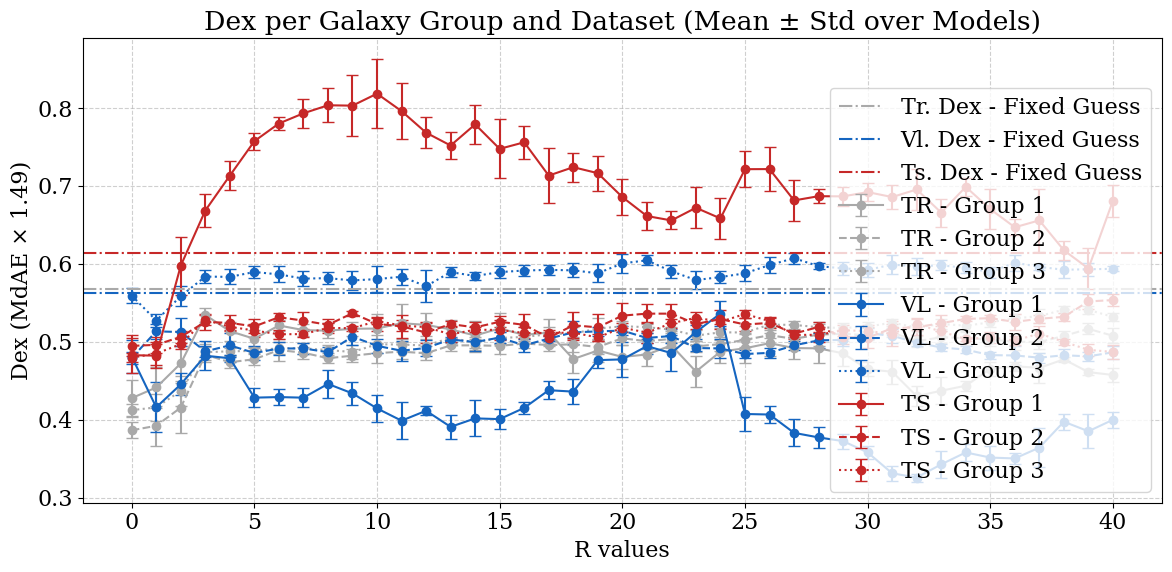

In [37]:

# NumPy-based custom dex function
def custom_median_absolute_error_np(dnrm_y_pred, dnrm_y_true):
    abs_diff = np.abs(np.array(dnrm_y_true) - np.array(dnrm_y_pred))
    return 1.49 * np.median(abs_diff)

# Galaxy groups
groups = {
    "Group 1": ["NGC_5068"],
    "Group 2": ["NGC_3351", "NGC_628C", "NGC_3627", "NGC_2835"],
    "Group 3": ["NGC_1512", "NGC_1566", "NGC_7496", "NGC_1433", "NGC_1365"]
}

# Subsets and styles
subsets = ['tr', 'vl', 'ts']
subset_colors = {'tr': colors[0], 'vl': colors[1], 'ts': colors[2]}
group_styles = {'Group 1': '-', 'Group 2': '--', 'Group 3': ':'}

# Initialize dex storage: means & stds
dex_stats = {subset: {group: {'mean': [], 'std': []} for group in groups} for subset in subsets}

# Loop through R values
for R in arr_R:
    dir_results = os.path.join(dir_top_results, f"R_{R}")
    
    for subset in subsets:
        for group_name in groups:
            dex_all_models = []  # store dex of each model
            
            for k in range(num_models_per_case):
                dir_results_model_k = os.path.join(dir_results, f"model_{k}")
                json_path = os.path.join(dir_results_model_k, "predictions_and_errors.json")
                
                with open(json_path, "r") as f:
                    results_dict = json.load(f)
                
                # Filter dataframe by group
                df = pd.DataFrame(results_dict[subset])
                group_df = df[df["galaxy_id"].isin(groups[group_name])]
                
                # Compute dex for this model
                dex = custom_median_absolute_error_np(group_df["y_pred"], group_df["y_true"])
                dex_all_models.append(dex)
            
            # Store mean and std for this R
            dex_stats[subset][group_name]['mean'].append(np.mean(dex_all_models))
            dex_stats[subset][group_name]['std'].append(np.std(dex_all_models))

# --- Plotting ---
plt.figure(figsize=(12, 6))
for subset in subsets:
    for group_name in groups:
        means = dex_stats[subset][group_name]['mean']
        stds  = dex_stats[subset][group_name]['std']
        
        plt.errorbar(arr_R, means, yerr=stds,
                     color=subset_colors[subset],
                     linestyle=group_styles[group_name],
                     marker='o',
                     capsize=4,
                     label=f'{subset.upper()} - {group_name}')

# --- Add horizontal baseline lines ---
plt.axhline(y=baseline_dex_tr, color=subset_colors['tr'], linestyle='-.', 
            label='Tr. Dex - Fixed Guess')
plt.axhline(y=baseline_dex_vl, color=subset_colors['vl'], linestyle='-.', 
            label='Vl. Dex - Fixed Guess')
plt.axhline(y=baseline_dex_ts, color=subset_colors['ts'], linestyle='-.', 
            label='Ts. Dex - Fixed Guess')

# --- Labels and Legend ---
plt.xlabel("R values")
plt.ylabel("Dex (MdAE × 1.49)")
plt.title("Dex per Galaxy Group and Dataset (Mean ± Std over Models)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc="lower right") 
plt.tight_layout()
plt.show()


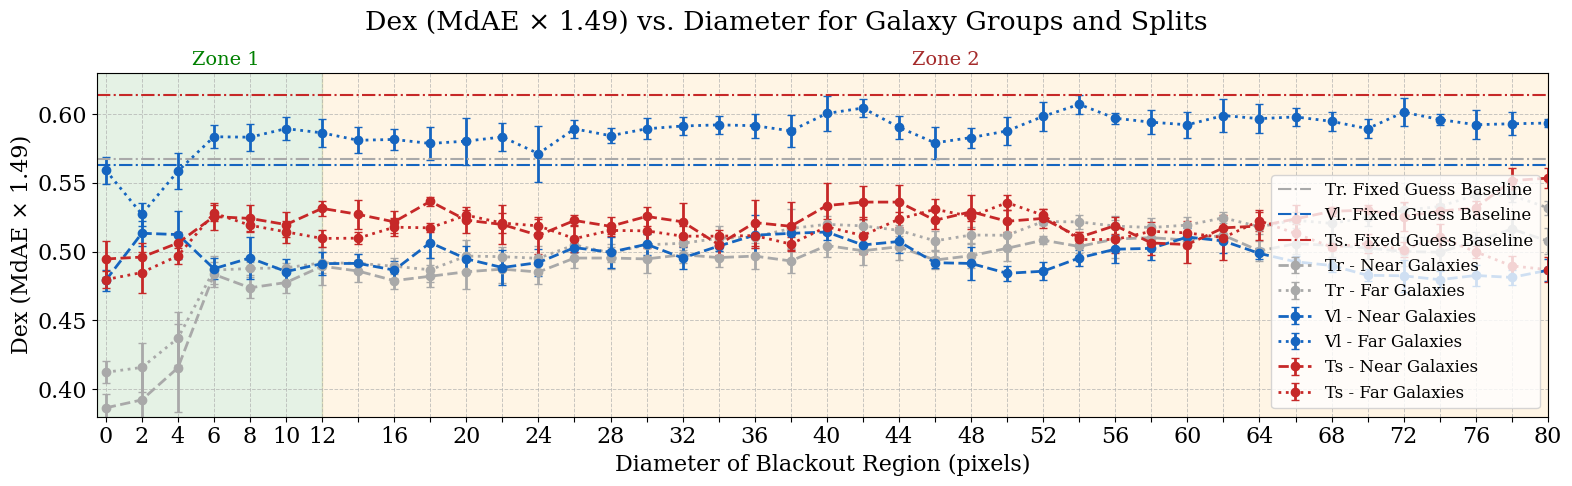

In [38]:

# -----------------------------
# Settings
# -----------------------------
groups = {
    "Group 2": ["NGC_3351", "NGC_628C", "NGC_3627", "NGC_2835"],
    "Group 3": ["NGC_1512", "NGC_1566", "NGC_7496", "NGC_1433", "NGC_1365"]
}
subsets = ['tr', 'vl', 'ts']
subset_colors = {'tr': colors[0], 'vl': colors[1], 'ts': colors[2]}
group_styles = {'Group 2': '--', 'Group 3': ':'}
group_labels = {"Group 2": "Near Galaxies", "Group 3": "Far Galaxies"}

# Font and figure style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16  # Journal style font size

# Convert R to diameter
arr_diam = [2 * r for r in arr_R]

# Custom tick logic: -0.5 to 80
x_min = -0.5
x_max = 80
xticks = np.arange(0, x_max + 1, 2)
xtick_labels = [str(x) if x <= 10 or x % 4 == 0 else '' for x in xticks]

# Start plot
fig = plt.figure(figsize=(16, 5))

# Background zones
plt.axvspan(x_min, 12, color='green', alpha=0.1)   # Zone 1: D ≤ 12
plt.axvspan(12, x_max, color='orange', alpha=0.1)  # Zone 2: D > 12

# Zone labels
fig.text(0.15, 0.87, 'Zone 1', ha='center', fontsize=14, color='green')
fig.text(0.6, 0.87, 'Zone 2', ha='center', fontsize=14, color='brown')

# Title
plt.suptitle("Dex (MdAE × 1.49) vs. Diameter for Galaxy Groups and Splits", y=0.98)

# Plot lines with error bars
for subset in subsets:
    for group_name in groups:
        means = dex_stats[subset][group_name]['mean']
        stds  = dex_stats[subset][group_name]['std']
        plt.errorbar(
            arr_diam, means, yerr=stds,
            color=subset_colors[subset],
            linestyle=group_styles[group_name],
            marker='o',
            capsize=3,
            linewidth=2,
            label=f'{subset.capitalize()} - {group_labels[group_name]}'
        )

# Baseline horizontal lines
plt.axhline(y=baseline_dex_tr, color=subset_colors['tr'], linestyle='-.', linewidth=1.5,
            label='Tr. Fixed Guess Baseline')
plt.axhline(y=baseline_dex_vl, color=subset_colors['vl'], linestyle='-.', linewidth=1.5,
            label='Vl. Fixed Guess Baseline')
plt.axhline(y=baseline_dex_ts, color=subset_colors['ts'], linestyle='-.', linewidth=1.5,
            label='Ts. Fixed Guess Baseline')

# Axis labels and limits
plt.xlabel("Diameter of Blackout Region (pixels)")
plt.ylabel("Dex (MdAE × 1.49)")
plt.xlim([x_min, x_max])
plt.ylim([0.38, 0.63])

# Custom x-ticks
plt.xticks(ticks=xticks, labels=xtick_labels)

# Custom y-ticks
plt.yticks(np.arange(0.4, 0.65, 0.05))

# Grid
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Legend
plt.legend(fontsize=12, loc="lower right", frameon=True)

# Save and show
plt.tight_layout()
plt.show()

In [39]:
# Distances of the Galaxies of the two clusters:
avg_dist_near = (9.01 + 9.84  + 9.96  + 11.32 ) /4

avg_dist_far = (17.69 + 18.63 + 18.72  + 18.83 + 19.57 ) /5

fraction_far_vs_near =  avg_dist_far/ avg_dist_near

print(avg_dist_near)
print(avg_dist_far)
print(fraction_far_vs_near)

10.0325
18.688
1.8627460752554197


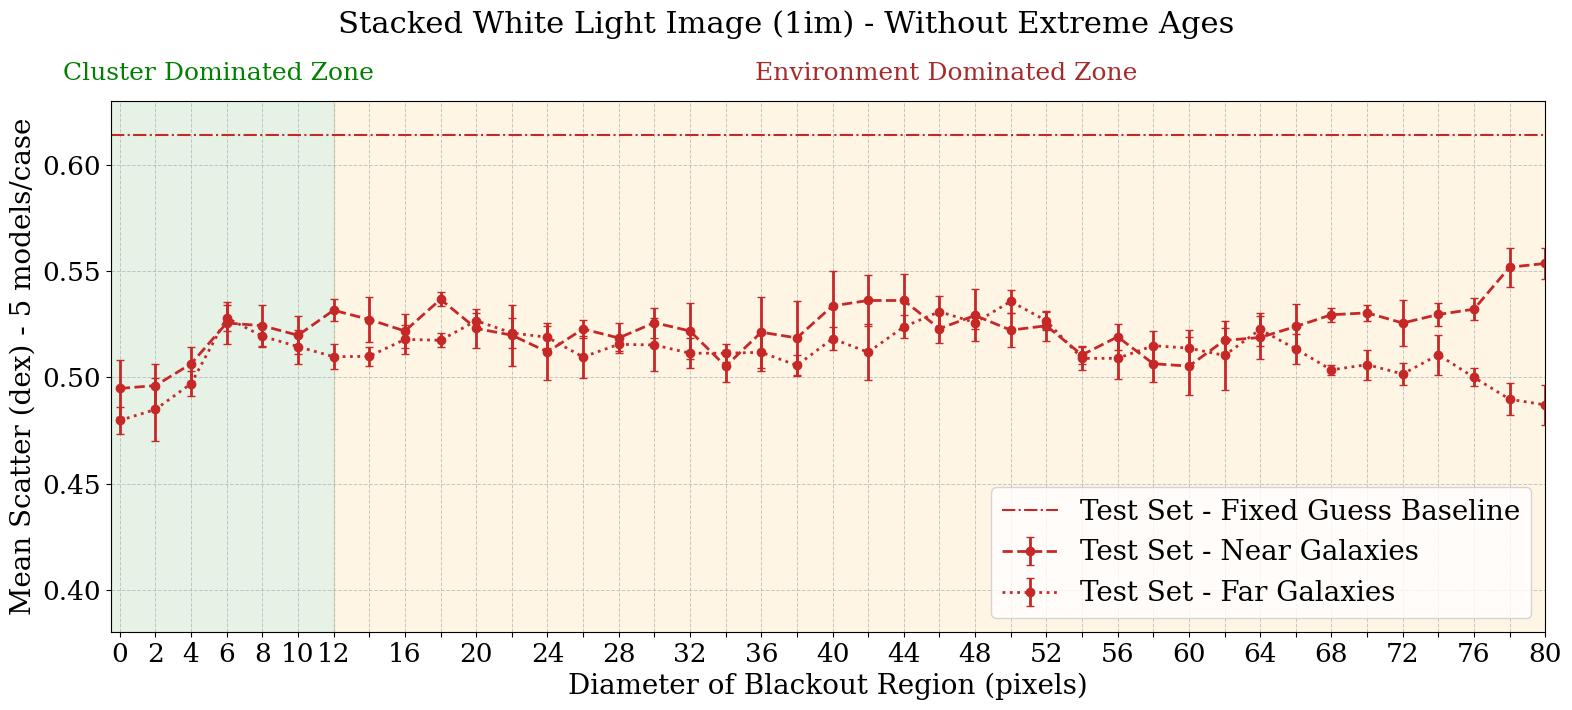

In [40]:

# -----------------------------
# Settings
# -----------------------------
groups = {
    "Group 2": ["NGC_3351", "NGC_628C", "NGC_3627", "NGC_2835"],
    "Group 3": ["NGC_1512", "NGC_1566", "NGC_7496", "NGC_1433", "NGC_1365"]
}
subsets = ['tr', 'vl', 'ts']
subset_colors = {'tr': colors[0], 'vl': colors[1], 'ts': colors[2]}
group_styles = {'Group 2': '--', 'Group 3': ':'}
group_labels = {"Group 2": "Near Galaxies", "Group 3": "Far Galaxies"}

# Font and figure style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16  # Journal style font size

# Convert R to diameter
arr_diam = [2 * r for r in arr_R]

# Custom tick logic: -0.5 to 80
x_min = -0.5
x_max = 80
xticks = np.arange(0, x_max + 1, 2)
xtick_labels = [str(x) if x <= 10 or x % 4 == 0 else '' for x in xticks]

# Start plot
fig = plt.figure(figsize=(16, 7))

# Background zones
plt.axvspan(x_min, 12, color='green', alpha=0.1)   # Zone 1: D ≤ 12
plt.axvspan(12, x_max, color='orange', alpha=0.1)  # Zone 2: D > 12

# Zone labels
fig.text(0.145, 0.92, 'Cluster Dominated Zone', ha='center', fontsize=18, color='green')
fig.text(0.6, 0.92, 'Environment Dominated Zone', ha='center', fontsize=18, color='brown')

# Title
plt.suptitle("Stacked White Light Image (1im) - Without Extreme Ages", y=1.02, fontsize=22)

# Plot lines with error bars
for subset in ['ts']:
    for group_name in groups:
        means = dex_stats[subset][group_name]['mean']
        stds  = dex_stats[subset][group_name]['std']
        plt.errorbar(
            arr_diam, means, yerr=stds,
            color=subset_colors[subset],
            linestyle=group_styles[group_name],
            marker='o',
            capsize=3,
            linewidth=2,
            label=f'Test Set - {group_labels[group_name]}'
        )

# Baseline horizontal lines
plt.axhline(y=baseline_dex_ts, color=subset_colors['ts'], linestyle='-.', linewidth=1.5,
            label='Test Set - Fixed Guess Baseline')

# Axis labels and limits
plt.xlabel("Diameter of Blackout Region (pixels)", fontsize=20)
plt.ylabel("Mean Scatter (dex) - 5 models/case", fontsize=20)
plt.xlim([x_min, x_max])
plt.ylim([0.38, 0.63])

# Custom x-ticks
plt.xticks(ticks=xticks, labels=xtick_labels)

# Custom y-ticks
plt.yticks(np.arange(0.4, 0.65, 0.05))

# Grid
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Legend
plt.legend(fontsize=20, loc="lower right", frameon=True)

# Size of the tick params
plt.tick_params(axis='x', which='major', labelsize=19)
plt.tick_params(axis='y', which='major', labelsize=19)

# Save and show
plt.tight_layout()
plt.show()

# New version of last plot

In [41]:
import json
from pathlib import Path

file_name = dir_top_results + "R_0/model_0/predictions_and_errors.json"

# ---- custom metric ----
def custom_median_absolute_error_np(dnrm_y_pred, dnrm_y_true):
    abs_diff = np.abs(np.array(dnrm_y_true) - np.array(dnrm_y_pred))
    return 1.49 * np.median(abs_diff)

groups = {
    "Group 2": ["NGC_3351", "NGC_628C", "NGC_3627", "NGC_2835"],
    "Group 3": ["NGC_1512", "NGC_1566", "NGC_7496", "NGC_1433", "NGC_1365"],
}

# ---- load ----
data = json.loads(Path(file_name).read_text())

tr = data.get("tr") or data.get("train") or []
ts = data.get("ts") or data.get("test") or []

all_y_true_ts = [float(r["y_true"]) for r in ts if "y_true" in r]
all_y_true_tr = [float(r["y_true"]) for r in tr if "y_true" in r]

guessed_mean_tr = float(np.mean(all_y_true_tr))

# ---- filters ----
g2_ids = set(groups["Group 2"])
g3_ids = set(groups["Group 3"])

y_ts_g2 = [float(r["y_true"]) for r in ts if r.get("galaxy_id") in g2_ids]
y_ts_g3 = [float(r["y_true"]) for r in ts if r.get("galaxy_id") in g3_ids]

# ---- apply custom error ----
results = {
    "guessed_mean_all_tr": guessed_mean_tr,
    "custom_error_all_ts_vs_tr": custom_median_absolute_error_np(
        [guessed_mean_tr] * len(all_y_true_ts), all_y_true_ts
    ),
    "Group 2": {
        "n": len(y_ts_g2),
        "custom_error_vs_tr_mean": custom_median_absolute_error_np(
            [guessed_mean_tr] * len(y_ts_g2), y_ts_g2
        ),
    },
    "Group 3": {
        "n": len(y_ts_g3),
        "custom_error_vs_tr_mean": custom_median_absolute_error_np(
            [guessed_mean_tr] * len(y_ts_g3), y_ts_g3
        ),
    },
}

# ---- print summary ----
print(f"guessed_mean_tr: {results['guessed_mean_all_tr']:.4f}")
print(f"custom error (ALL ts vs tr_mean): {results['custom_error_all_ts_vs_tr']:.4f}")
print()
print(f"Group 2 -> n={results['Group 2']['n']}, custom_error_vs_tr_mean={results['Group 2']['custom_error_vs_tr_mean']:.4f}")
print(f"Group 3 -> n={results['Group 3']['n']}, custom_error_vs_tr_mean={results['Group 3']['custom_error_vs_tr_mean']:.4f}")


value_ts_group_2 = results['Group 2']['custom_error_vs_tr_mean']
value_ts_group_3 = results['Group 3']['custom_error_vs_tr_mean']

guessed_mean_tr: 8.0991
custom error (ALL ts vs tr_mean): 0.6138

Group 2 -> n=208, custom_error_vs_tr_mean=0.6318
Group 3 -> n=208, custom_error_vs_tr_mean=0.6116


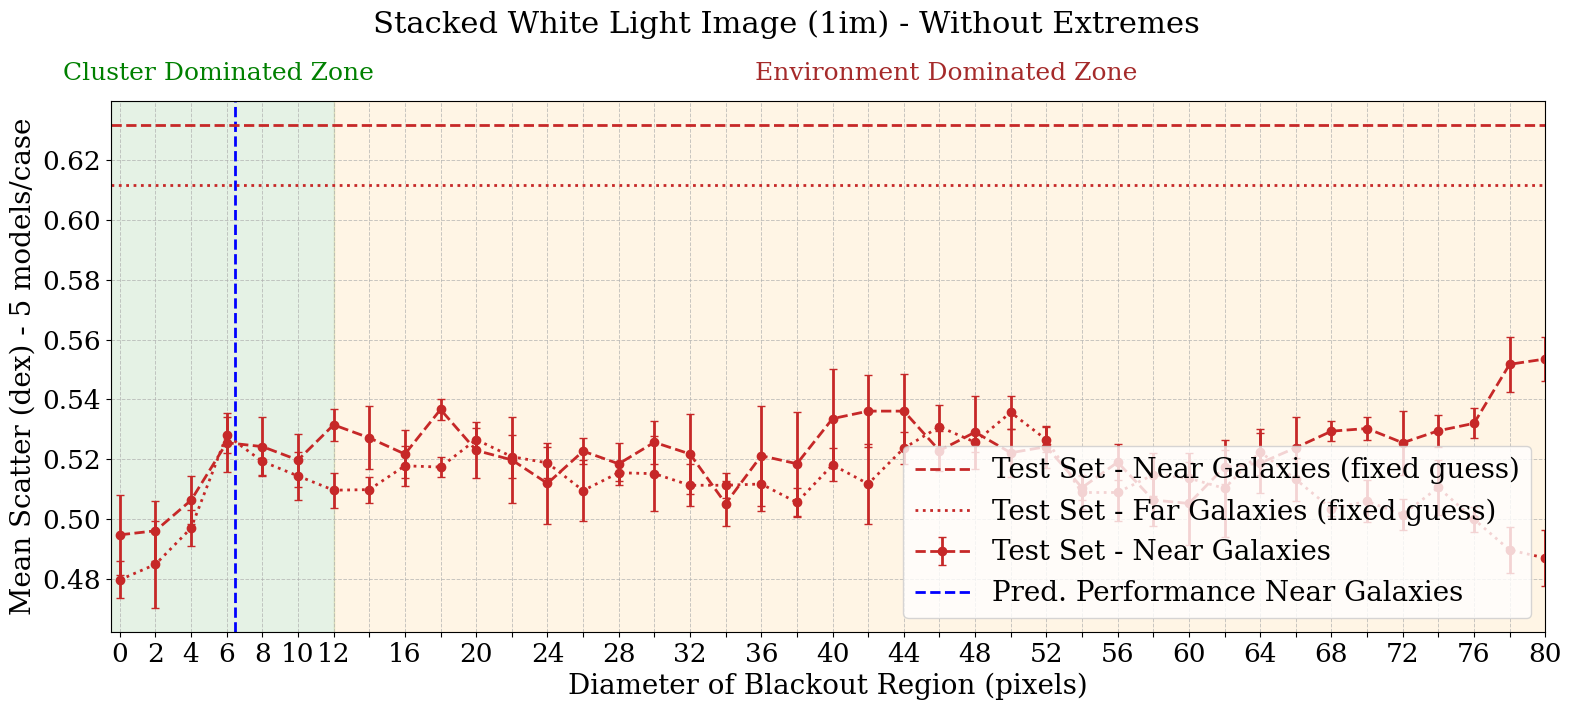

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Settings
# -----------------------------
groups = {
    "Group 2": ["NGC_3351", "NGC_628C", "NGC_3627", "NGC_2835"],
    "Group 3": ["NGC_1512", "NGC_1566", "NGC_7496", "NGC_1433", "NGC_1365"]
}
subsets = ['tr', 'vl', 'ts']
subset_colors = {'tr': colors[0], 'vl': colors[1], 'ts': colors[2]}
group_styles = {'Group 2': '--', 'Group 3': ':'}
group_labels = {"Group 2": "Near Galaxies", "Group 3": "Far Galaxies"}

# Get baseline values from results
value_ts_group_2 = results['Group 2']['custom_error_vs_tr_mean']
value_ts_group_3 = results['Group 3']['custom_error_vs_tr_mean']

# Font and figure style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16  # Journal style font size

# Convert R to diameter
arr_diam = [2 * r for r in arr_R]

# Custom tick logic: -0.5 to 80
x_min = -0.5
x_max = 80
xticks = np.arange(0, x_max + 1, 2)
xtick_labels = [str(x) if x <= 10 or x % 4 == 0 else '' for x in xticks]

# Start plot
fig = plt.figure(figsize=(16, 7))

# Zone spans
span_zone_B = 12
span_zone_A = span_zone_B * 1/fraction_far_vs_near

# Vertical line at span_zone_A
plt.axvline(x=span_zone_A, color='blue', linestyle='--', linewidth=2, label='Pred. Performance Near Galaxies')

# Background zones
plt.axvspan(x_min, 12, color='green', alpha=0.1)   # Zone 1: D ≤ 12
plt.axvspan(12, x_max, color='orange', alpha=0.1)  # Zone 2: D > 12

# Zone labels
fig.text(0.145, 0.92, 'Cluster Dominated Zone', ha='center', fontsize=18, color='green')
fig.text(0.6, 0.92, 'Environment Dominated Zone', ha='center', fontsize=18, color='brown')

# Title
plt.suptitle("Stacked White Light Image (1im) - Without Extremes", y=1.02, fontsize=22)

# Plot lines with error bars
for subset in ['ts']:
    for group_name in groups:
        means = dex_stats[subset][group_name]['mean']
        stds  = dex_stats[subset][group_name]['std']
        plt.errorbar(
            arr_diam, means, yerr=stds,
            color=subset_colors[subset],
            linestyle=group_styles[group_name],
            marker='o',
            capsize=3,
            linewidth=2,
            label=f'Test Set - {group_labels[group_name]}'
        )

# Baseline horizontal lines (custom group-specific)
plt.axhline(
    y=value_ts_group_2,
    color=subset_colors['ts'],
    linestyle='--',
    linewidth=2,
    label='Test Set - Near Galaxies (fixed guess)'
)

plt.axhline(
    y=value_ts_group_3,
    color=subset_colors['ts'],
    linestyle=':',
    linewidth=2,
    label='Test Set - Far Galaxies (fixed guess)'
)

# Axis labels and limits
plt.xlabel("Diameter of Blackout Region (pixels)", fontsize=20)
plt.ylabel("Mean Scatter (dex) - 5 models/case", fontsize=20)
plt.xlim([x_min, x_max])

# Custom x-ticks
plt.xticks(ticks=xticks, labels=xtick_labels)

# Grid
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Legend handling
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 2, 3, 0]   # adjust as needed
plt.legend([handles[i] for i in order], [labels[i] for i in order],
           fontsize=20, loc="lower right", frameon=True)

# Size of the tick params
plt.tick_params(axis='x', which='major', labelsize=19)
plt.tick_params(axis='y', which='major', labelsize=19)

# Save and show
plt.tight_layout()

plt.show()


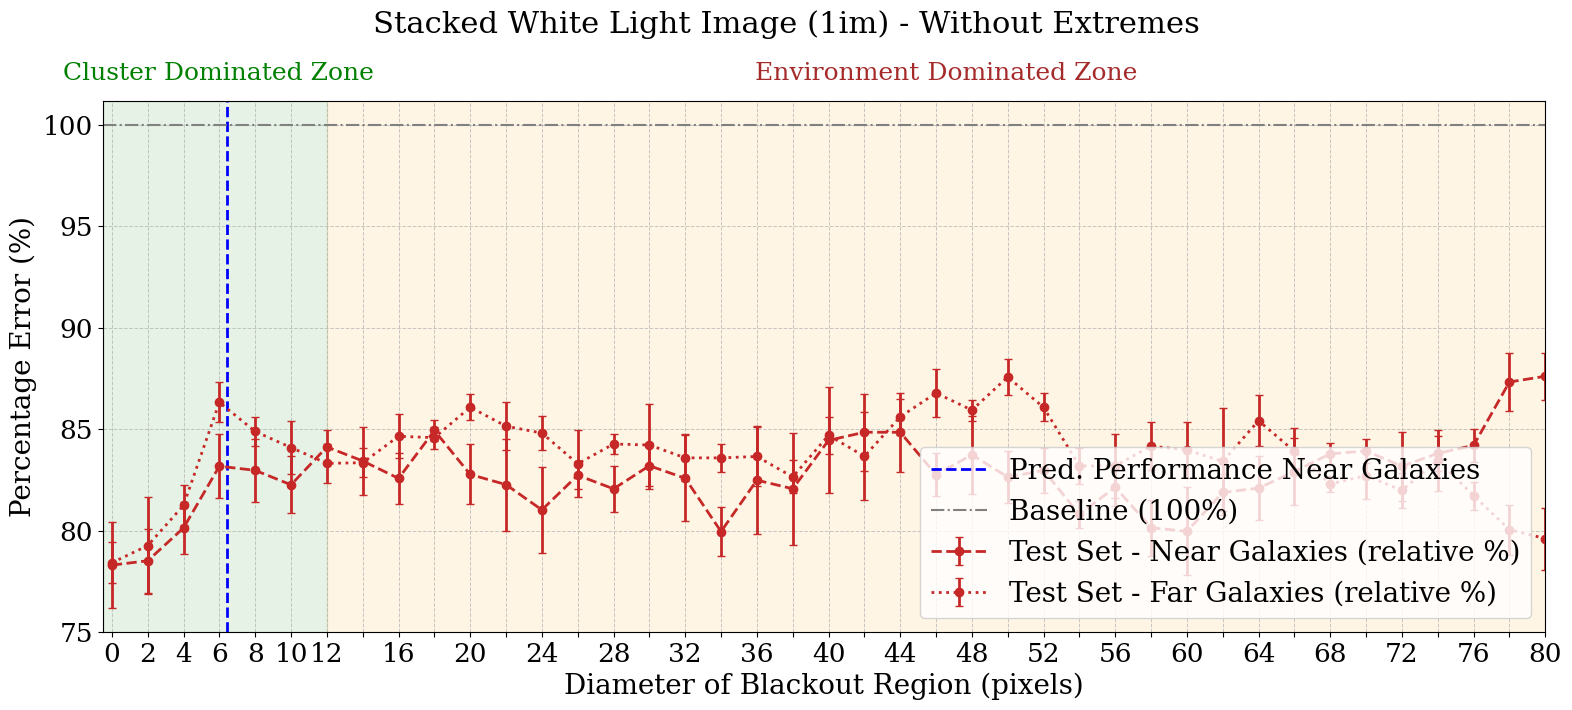

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Settings
# -----------------------------
groups = {
    "Group 2": ["NGC_3351", "NGC_628C", "NGC_3627", "NGC_2835"],
    "Group 3": ["NGC_1512", "NGC_1566", "NGC_7496", "NGC_1433", "NGC_1365"]
}
subsets = ['tr', 'vl', 'ts']
subset_colors = {'tr': colors[0], 'vl': colors[1], 'ts': colors[2]}
group_styles = {'Group 2': '--', 'Group 3': ':'}
group_labels = {"Group 2": "Near Galaxies", "Group 3": "Far Galaxies"}

# Get baselines (custom fixed-guess errors per group)
value_ts_group_2 = results['Group 2']['custom_error_vs_tr_mean']
value_ts_group_3 = results['Group 3']['custom_error_vs_tr_mean']

# Font and figure style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16  # Journal style font size

# Convert R to diameter
arr_diam = np.array([2 * r for r in arr_R])

# Custom tick logic: -0.5 to 80
x_min = -0.5
x_max = 80
xticks = np.arange(0, x_max + 1, 2)
xtick_labels = [str(x) if x <= 10 or x % 4 == 0 else '' for x in xticks]

# Start plot
fig = plt.figure(figsize=(16, 7))

# Optional backgrounds & markers (kept as in your plot)
span_zone_B = 12
span_zone_A = span_zone_B * 1 / fraction_far_vs_near
plt.axvline(x=span_zone_A, color='blue', linestyle='--', linewidth=2,
            label='Pred. Performance Near Galaxies')

plt.axvspan(x_min, 12, color='green', alpha=0.1)   # Zone 1: D ≤ 12
plt.axvspan(12, x_max, color='orange', alpha=0.1)  # Zone 2: D > 12

fig.text(0.145, 0.92, 'Cluster Dominated Zone', ha='center', fontsize=18, color='green')
fig.text(0.6, 0.92, 'Environment Dominated Zone', ha='center', fontsize=18, color='brown')

plt.suptitle("Stacked White Light Image (1im) - Without Extremes", y=1.02, fontsize=22)

# -----------------------------
# Compute % curves (relative to each group's fixed-guess baseline)
# y% = (mean / baseline) * 100 ; err% = (std / baseline) * 100
# -----------------------------
means_g2 = np.array(dex_stats['ts']['Group 2']['mean'])
stds_g2  = np.array(dex_stats['ts']['Group 2']['std'])
y_g2_pct = (means_g2 / value_ts_group_2) * 100.0
e_g2_pct = (stds_g2  / value_ts_group_2) * 100.0

means_g3 = np.array(dex_stats['ts']['Group 3']['mean'])
stds_g3  = np.array(dex_stats['ts']['Group 3']['std'])
y_g3_pct = (means_g3 / value_ts_group_3) * 100.0
e_g3_pct = (stds_g3  / value_ts_group_3) * 100.0

# Plot only two curves (Near and Far), both in test-set color, different linestyles
plt.errorbar(
    arr_diam, y_g2_pct, yerr=e_g2_pct,
    color=subset_colors['ts'],
    linestyle=group_styles['Group 2'],
    marker='o', capsize=3, linewidth=2,
    label=f'Test Set - {group_labels["Group 2"]} (relative %)'
)

plt.errorbar(
    arr_diam, y_g3_pct, yerr=e_g3_pct,
    color=subset_colors['ts'],
    linestyle=group_styles['Group 3'],
    marker='o', capsize=3, linewidth=2,
    label=f'Test Set - {group_labels["Group 3"]} (relative %)'
)

# Optional: reference line at 100% (equal to baseline)
plt.axhline(100.0, color='gray', linestyle='-.', linewidth=1.5, label='Baseline (100%)')

# Axis labels and limits
plt.xlabel("Diameter of Blackout Region (pixels)", fontsize=20)
plt.ylabel("Percentage Error (%)", fontsize=20)
plt.xlim([x_min, x_max])

# Custom x-ticks
plt.xticks(ticks=xticks, labels=xtick_labels)

# Grid
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Legend (re-order if you like)
handles, labels = plt.gca().get_legend_handles_labels()
# Example order: Near curve, Far curve, vertical marker, baseline
order = [0, 1, 2, 3] if len(handles) >= 4 else list(range(len(handles)))
plt.legend([handles[i] for i in order], [labels[i] for i in order],
           fontsize=20, loc="lower right", frameon=True)

# Tick sizes
plt.tick_params(axis='x', which='major', labelsize=19)
plt.tick_params(axis='y', which='major', labelsize=19)

# Save and show
plt.tight_layout()
plt.savefig(
    f"plots_storage/plot_1im_dex_by_D_relative_percent_ts_remextremes_{txt_remextremes}_augment_no_blackout_{extension}_normby_single-image.svg",
    bbox_inches='tight', pad_inches=0.2
)
plt.show()
